**Outline**

1. Topic Review
2. Case 1 - Auto Mobile
3. Case 2 - Expenditure
4. Case 3 - Marketing Campaign

- We need to import library and function that need to run the code in this notebook to:
  - load data
  - doing simulation
  - drawing graph and other visualization

In [1]:
%pip install "https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl"
# load data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
import statsmodels.formula.api as smf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.3 MB/s eta 0:00:00


In [2]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from statsmodel library
    :return df: <pandas DataFrame>
    """
    coef = results.params
    std_err = results.bse

    df = pd.DataFrame(data = np.transpose([coef, std_err]),
                      index = coef.index,
                      columns=["coef","std err"])
    return df

## **Topic Review**
---

- Regression model have some assumptions, here's the list from the most important to the less
  1. Validity
  2. Representativeness
  3. Noadditivity and Linearity
  4. Independence of errors
  5. Equal variance of errors
  6. Normality of errors
  
- We can keep the goals of first and second assumption along the way we set understanding on the data and how we infer from the result of regression
- The third assumption works on the simple linear regression settings, we can keep this assumption by understand the data and setting the model in the first place

- We can use data plotting to diagnostic 4-6 assumption, however, pratically these assumption is minor

## **Case 1 - Automobile**
---

The Energy Policy and Conservation Act of 1975 established the corporate average fuel economy standards, which currently require cars to achieve 30.2 miles per gallon and will increase to more than 50 miles per gallon by 2025. To achieve these standards, manufacturers may consider reducing the weight of their cars, but may hesitate due to the higher cost of lighter materials such as carbon fiber and aluminum. Manufacturers want evidence of the benefits of reducing a car's weight by 200 pounds, including the expected improvement in mileage.

### Load Data

In [3]:
auto = pd.read_csv('Auto.csv', na_values='?').dropna()
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


- Check the pattern in weight and mpg variables in charges using visualization

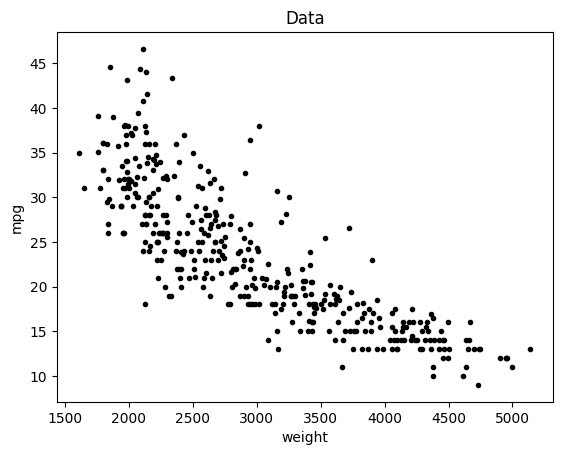

In [4]:
x = auto['weight']
y = auto['mpg']

# Plot the data
plt.scatter(x, y, color = "k", marker=".")

# Add a legend and labels

plt.xlabel("weight")
plt.ylabel("mpg")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

- The scatterplot and fitted line show negative association. Heavier cars on average get fewer miles per gallon.
- The scatterplot shows relationship between weight and mpg is not linear pattern
- Let's try fitting the model ignoring the linearity assumption and see how the model performance and interpret the result

### Fit Linear Regression - Using Horsepower Variable
- Build the model using ols

### Insight

In [11]:
# Create OLS model object
model = smf.ols("mpg ~ weight", auto)

# Fit the model
results_model_weight = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_weight = print_coef_std_err(results_model_weight)

In [12]:
results_weight


,coef,std err
Intercept,46.216525,0.798672
weight,-0.007647,0.000258


$$\text{mpg} = 46 - 0.008\times\text{weight}$$
- If we compare two cars that have 1 difference in weight (lbs) the expected miles per galon of the lighter weight car have less 0.008 miles per gallon than the heavier car


In [13]:
expected_mpg_200 = results_weight["coef"]["Intercept"]+results_weight["coef"]["weight"]*200
expected_mpg_200

44.68705604186169

In [14]:
expected_mpg_400 = results_weight["coef"]["Intercept"]+results_weight["coef"]["weight"]*400
expected_mpg_400

43.157587534705776

In [15]:
diff_mpg_200 = expected_mpg_200-expected_mpg_400
diff_mpg_200

1.5294685071559115

- The regression estimate that the the car that have lighter 200 lb weight have 1.6 more expected miles per galon
- The evidence from the regression can be processed to calculate the financial simulation whether the reduction of 200 lbs can financially possible and worth to achieve the standard miles per gallon

#### Limitation:
- The analysis use the weight from various brand of car, the coefficient will remain the same through big SUV and small compact
- The vehicles used in regression differ in many other ways, wich could influence fuel consumption, apart from weight. These variations may include different types of engines and transmissions. Therefore, any impact we attribute to weight might actually be linked to these underlying variables.

### Evaluation

- Visualize the data and the regression line




In [17]:
import statsmodels.api as sm

predictor_hp = "horsepower"
outcome_hp = "mpg"

X_hp = sm.add_constant(auto[predictor_hp])
y_hp = auto[outcome_hp]

model_hp = sm.OLS(y_hp, X_hp).fit()
results_horsepower = model_hp.params.to_frame("coef")


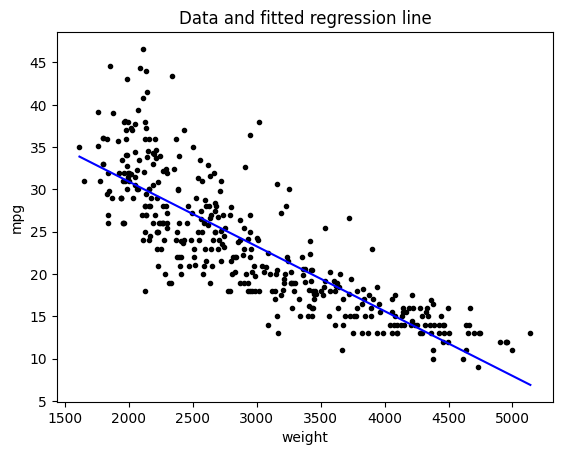

In [24]:
predictor = "weight"
outcome = "mpg"
data = auto.copy()
results_ = results_horsepower.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
results_ = results_weight.copy()
a_hat = results_.loc["Intercept", "coef"]
b_hat = results_.loc["weight", "coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
# plt.legend()
plt.ylabel(outcome)
plt.xlabel(predictor)

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

In [25]:
print(results_.index)


Index(['Intercept', 'weight'], dtype='object')


- The regression line is positioned beneath the majority of data points towards the left that correspond to lighter cars, above most of the points in the center, and once again below the points on the right that correspond to heavier cars.

#### Residual Plot and Explained Variance

Text(0.5, 1.0, 'Residuals vs. Predicted mpg')

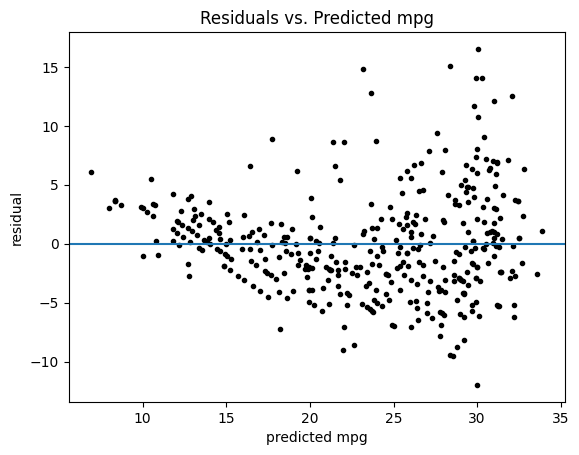

In [26]:
plt.scatter(results_model_weight.fittedvalues, results_model_weight.resid, marker=".", c = "k")

# Plot the horizontal line in 0 as the fitted line
plt.axhline([0])

plt.xlabel("predicted mpg")
plt.ylabel("residual")
plt.title(f"Residuals vs. Predicted mpg")

In [27]:
results_model_weight.rsquared

0.6926304331206254

The residuals produce a noticeable pattern make the lack of fit more apperent eventhough the fitted line explain more than two-thirds (69%) of variation in mileage

#### Normality of error assumption

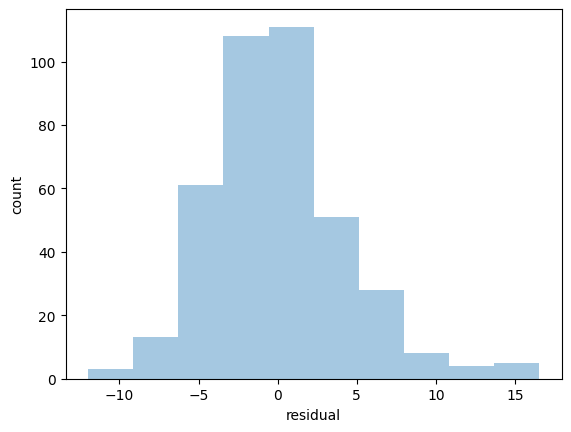

In [28]:
plt.hist(results_model_weight.resid, color='tab:blue', alpha=0.4)
plt.xlabel("residual")
plt.ylabel("count")

plt.show()

- We see that the distribution of residual is nearly normal, however the assumption of normally error is minor for the purpose of estimating regression line.

- We can improve the model by doing transformation as remedies for linearity assumption violation (the data we have shows curved pattern)
- By employing transformations, we can utilize regression analysis to derive an equation that characterizes a nonlinear pattern. This method enables us to analyze data that exhibits a curved relationship.
- In business settings, two nonlinear transformations are especially valuable: reciprocals and logarithms. Reciprocals convert the observed data, d, into 1/d. On the other hand, logarithms convert d into log d.

### Fit Linear Regression - Using Log Transform on Weight Variable

In [29]:
auto['logweight'] = np.log(auto["weight"])
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,logweight
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,8.161660
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,8.214194
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,8.142063


In [30]:
# Create OLS model object
model = smf.ols("mpg ~ logweight", auto)

# Fit the model
results_logtransform = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_weight_log = print_coef_std_err(results_logtransform)

In [31]:
results_logtransform.rsquared

0.7126631343895842

- Doing log transformation on horsepower variables increase the R-squared by 11%
- We can explore another transformation called reciprocal transformation and see how the model perform

### Fit Linear Regression - Using Reciprocal Transform on Weight Variable

In [32]:
auto['rec_weight'] = 1/auto["weight"]
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,logweight,rec_weight
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,8.161660,0.000285
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,8.214194,0.000271
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,8.142063,0.000291


In [33]:
# Create OLS model object
model = smf.ols("mpg ~ rec_weight", auto)

# Fit the model
results_rectransform = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_weight_rec = print_coef_std_err(results_rectransform)

In [34]:
results_rectransform.rsquared

0.7067452746381531

- Reciprocal transformation does help the model gain better performance, but the model with log transformation does have the highest R-squared
- Visualize the data and the regression line

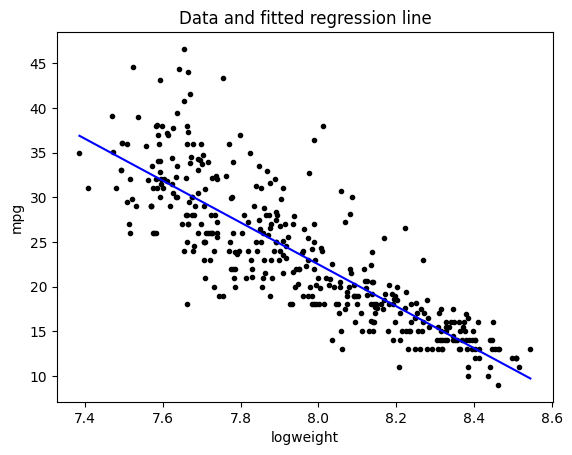

In [35]:
predictor = "logweight"
outcome = "mpg"
data = auto.copy()
results_ = results_weight_log.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
# plt.legend()
plt.ylabel(outcome)
plt.xlabel(predictor)

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

- The model with transformation have fitted line that centered to the data
- Since we transform the weight, the idea in coeffiecient interpretation must in term log, and we discuss it latter in the next materials
## **Case 2 -  Expenditure and Money Stock**
---

- You want to know the relationship between consumer expenditure vs. money stock (the supply of available money in the economy).
- However the data is collected yearly, We need to inspect the assumption of the independence of error first

### Load Data

In [38]:
expenditure = pd.read_csv("expenditure.txt", sep="\t")

# Strip whitespace in columns name
expenditure = expenditure.rename(columns = {i:i.strip() for i in expenditure.columns})

# Show first 5 row
expenditure

,Year,Quarter,Expenditure,Stock
0,1952,1,214.6,159.3
1,1952,2,217.7,161.2
2,1952,3,219.6,162.8
3,1952,4,227.2,164.6
4,1953,1,230.9,165.9
5,1953,2,233.3,167.9
6,1953,3,234.1,168.3
7,1953,4,232.3,169.7
8,1954,1,233.7,170.5
9,1954,2,236.5,171.6


### Fit Linear Regression

In [39]:
# Create OLS model object
model = smf.ols("Expenditure ~ Stock", expenditure)

# Fit the model
results = model.fit()

# Extract the residual of the model
residual_model_id = results.resid.copy()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_id = print_coef_std_err(results)

# Extract the predicted values of the model
predicted_id = results.fittedvalues.copy()

### Data and Fitted Line



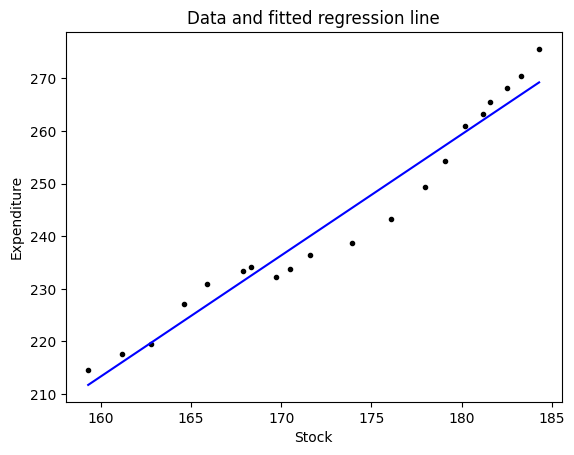

In [40]:
predictor = "Stock"
outcome = "Expenditure"
data = expenditure.copy()
results_ = results_id.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
# plt.legend()
plt.ylabel(outcome)
plt.xlabel(predictor)

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

- Some datas are above and some others are below the line, it shows some prediction are higher that the predicted values, and some others are lower than the predicted values, the residual plot can also tell this pattern.
- However since the data have time index, we have to check plot the residual and time index of the data to see whether the independence of error are violated

### Residual Plot

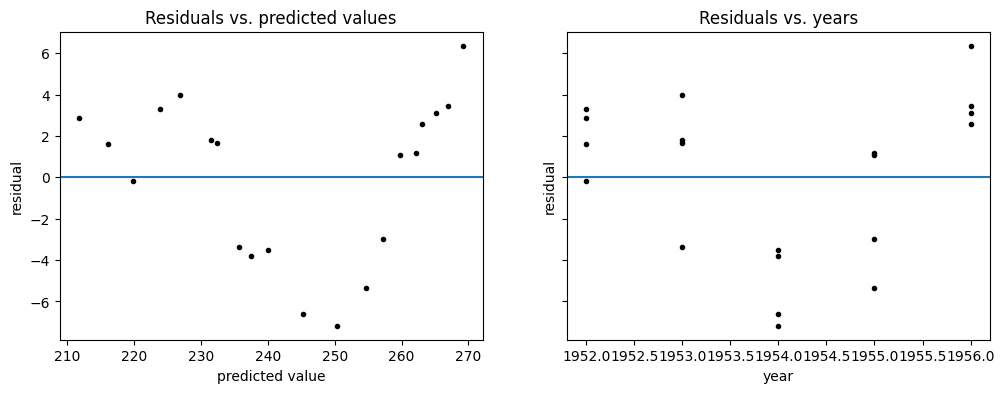

In [41]:
predictor = "Stock"
outcome = "Year"
data = expenditure.copy()
resisual_ = residual_model_id.copy()
predicted_ = predicted_id.copy()

# Create two plots

fig, axes = plt.subplots(1,2, figsize=(12, 4), sharey=True)

plot_option = {0 : predicted_,
              1 : np.round(data[outcome])}

xlabel = {0 : r"predicted value",
          1 : r"year"}

for i in range(2):
    # Plot the data
    axes[i].scatter(plot_option[i], results.resid, marker=".", c = "k")

    # Plot the horizontal line in 0 as the fitted line
    axes[i].axhline([0])

    # Add a title and labels
    axes[i].set_xlabel(xlabel[i])
    axes[i].set_ylabel("residual")
    axes[i].set_title(f"Residuals vs. {xlabel[i]}s")

# Show the plot
plt.show()

- As we expected, some of predicted values are have positive residual (the predicted values are lower than the actual data) and some other have negative residual (the predicted values are higher the actual data)
- We also see the V shape in residual vs. time plot, it shows we have time trend in residual, it represent the violation of independendence error assumption
- We face the time series data that violate the independence of error, Modelling time series data in regression can considering year variables as one of the predictior, using autoregression model, or other timeseries model which beyond the scope of this course

## **Case 3 - Marketing Campaign**
---

A new product is going to be added to the menu of a fast-food chain, but they are unsure which of the three potential marketing strategies to use for promoting it. To decide which approach will have the biggest impact on sales, they have introduced the new product in various randomly selected markets. Each location is utilizing a distinct promotional strategy, and the sales of the new item during the first four weeks are being documented.

**Objective**
- Determine which promotion stategy that have biggest impact on sales
- Determine which promotion strategy on certain market size that have highest expected sales.

### Load Data

In [43]:
marketing = pd.read_csv("MarketingCampaign.csv")
marketing

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,2,5,2,1,27.81
1,1,Medium,2,5,2,2,34.67
2,1,Medium,2,5,2,3,27.98
3,1,Medium,2,5,2,4,27.72
4,1,Medium,3,12,1,1,44.54
...,...,...,...,...,...,...,...
355,10,Large,919,2,1,4,64.34
356,10,Large,920,14,2,1,50.20
357,10,Large,920,14,2,2,45.75
358,10,Large,920,14,2,3,44.29


In [44]:
marketing["MarketSize"].value_counts()

,count
MarketSize,
Medium,204
Large,120
Small,36


In [45]:
marketing["MarketSize"] = marketing["MarketSize"].map({"Small":0,"Medium":1,"Large":2})
marketing["MarketSize"].value_counts()

,count
MarketSize,
1,204
2,120
0,36


### Fit Linear Regression

In [47]:
# Create OLS model object
model = smf.ols('SalesInThousands ~ Promotion + MarketSize', data = marketing)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_campaign = print_coef_std_err(results)

### Data and Fitted Line

- Remember that the promotion we have is an indicator variables, we can plot the fitted line in separate line to indicate the fitted regression in each promotion
- You can separate each line in different gragh as below, this way of drawing the fitted line, can give you more clean overview if you have much variation in the data

<ipython-input-48-bb420addfd4d>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].plot(x_domain, results.params[0] + results.params[1]*i  + results.params[2]*x_domain , c=color[i], label=f"fitted line (promotion={i+1})")
<ipython-input-48-bb420addfd4d>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].plot(x_domain, results.params[0] + results.params[1]*i  + results.params[2]*x_domain , c=color[i], label=f"fitted line (promotion={i+1})")


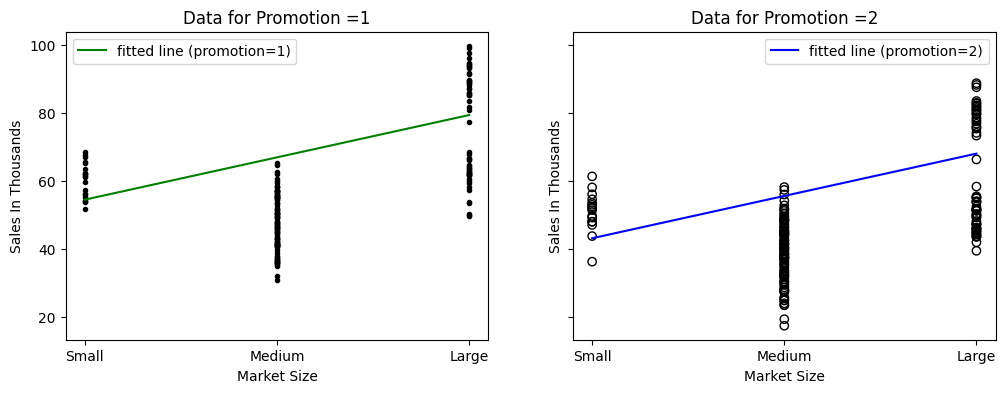

In [48]:
fig, axes = plt.subplots(1,2, figsize=(12, 4), sharey=True)
x_domain = np.linspace(marketing["MarketSize"].min(), marketing["MarketSize"].max(), 100)

mark = {1:"o", 0:"."}
fc = {1:"none", 0:"k"}
ec = {1:"k", 0:"face"}
color = {1:"b", 0:"g"}


for i in range(2):
    axes[i].scatter(marketing[marketing["Promotion"]==i+1]["MarketSize"], marketing[marketing["Promotion"]==i+1]["SalesInThousands"],
                    marker = mark[i],
                    facecolors = fc[i],
                    edgecolors = ec[i])

    axes[i].plot(x_domain, results.params[0] + results.params[1]*i  + results.params[2]*x_domain , c=color[i], label=f"fitted line (promotion={i+1})")

    axes[i].set_xlabel("Market Size")
    axes[i].set_ylabel("Sales In Thousands")
    axes[i].set_xticks(np.arange(0,3,1))
    axes[i].set_xticklabels(["Small", "Medium", "Large"])

    axes[i].legend()
    axes[i].set_title(f"Data for Promotion ={i+1}")

Or you can draw two lines in one graph

<ipython-input-49-08b79ea09ae5>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(x_domain, results.params[0] + results.params[1]*i  + results.params[2]*x_domain , c=color[i], label=f"fitted line (promotion={i+1})")
<ipython-input-49-08b79ea09ae5>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(x_domain, results.params[0] + results.params[1]*i  + results.params[2]*x_domain , c=color[i], label=f"fitted line (promotion={i+1})")


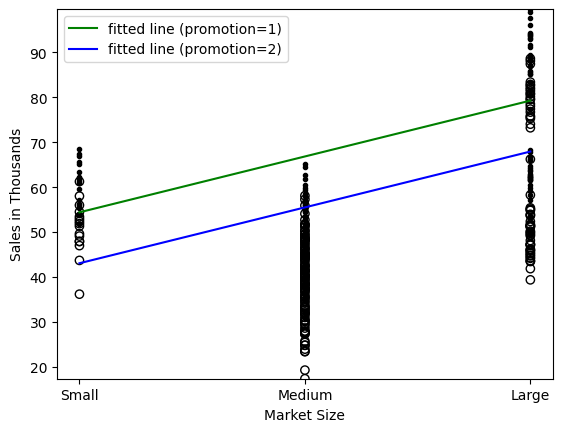

In [49]:
fig, ax = plt.subplots()
x_domain = np.linspace(marketing["MarketSize"].min(), marketing["MarketSize"].max(), 100)

mark = {1:"o", 0:"."}
fc = {1:"none", 0:"k"}
ec = {1:"k", 0:"face"}
color = {1:"b", 0:"g"}



for i in range(2):
    ax.scatter(marketing[marketing["Promotion"]==i+1]["MarketSize"], marketing[marketing["Promotion"]==i+1]["SalesInThousands"],
                    marker = mark[i],
                    facecolors = fc[i],
                    edgecolors = ec[i])
    ax.plot(x_domain, results.params[0] + results.params[1]*i  + results.params[2]*x_domain , c=color[i], label=f"fitted line (promotion={i+1})")

    ax.set_ylim([marketing["SalesInThousands"].min(), marketing["SalesInThousands"].max()])
    ax.set_xticks(np.arange(0,3,1))
    ax.set_xticklabels(["Small", "Medium", "Large"])

    ax.set_xlabel("Market Size")
    ax.set_ylabel("Sales in Thousands")
    ax.legend()


### Insight and Recomendation

After we build the model and get the estimated coefficient, in this section interpret and use them to answer these question
> 1. Determine which promotion stategy that have biggest impact on sales
2. Determine which promotion strategy on certain market size that have highest expected sales.

We can answer the first question by looking at the estimated coefficient of Promotion

In [50]:
results_campaign

,coef,std err
Intercept,54.399269,2.717781
Promotion,-11.341970,1.462310
MarketSize,12.438339,1.186654


$$\text{SalesInThousands} = 54 - 11\times\text{Promotion} + 12\times\text{MarketSize}$$
We can answer the second question by calculating the expected sales in each market size using Promotion 1 and Promotion 2

In [51]:

# store each estimated coefficient
intercept = results_campaign["coef"]["Intercept"]
w_promote = results_campaign["coef"]["Promotion"]
w_marketsize = results_campaign["coef"]["MarketSize"]

# calculate each expected sales in each market size and promotions
expected_sales_list = []

for i in range(1,3):
    market_list = [intercept + w_promote*i + w_marketsize*j for j in range(0,3)]
    expected_sales_list.append(market_list)

# store the results in DataFrame

promotion = ["Promotion 1","Promotion 2"]
marketsize = ["small","medium","large"]

expected_sales = pd.DataFrame(expected_sales_list, index = promotion, columns = marketsize)
expected_sales

,small,medium,large
Promotion 1,43.057299,55.495638,67.933978
Promotion 2,31.715329,44.153669,56.592008


#### Insight:
- Across all market size, the promotion type 1 have higher expected sales, by 11 thousands dollar than promotion 2
- Using promotion type 1, the largest market size gain highest predicted sales estimate others, by 68 thousands dollar



#### Recommendation:
- Company should continue doing promotion type 1 especially in large market size
- Consider other variable to maximize the sales of the promotion beside the market size